The correct process for converting the **binary vector detection problem** over a time diversity fading channel into a **scalar detection problem** is as follows:

---

### **Given:**
- The **transmitted symbol** $x \in \{-1, +1\}$ (BPSK) is repeated $N$ times using a repetition code.
- **Received signal** over $N$ time slots:
$y_i = h_i x + n_i, \quad i = 1, 2, \dots, N,$
  where:
  - $h_i \sim \mathcal{C}\mathcal{N}(0, 1)$ (time-varying fading coefficient),
  - $n_i \sim \mathcal{C}\mathcal{N}(0, N_0)$ (AWGN noise).

---

### **Steps to Convert to Scalar Detection Problem:**

1. **Combine All Observations**:
   To exploit the time diversity, combine the received signals from all $N$ time slots into a single metric:
$z = \sum_{i=1}^N h_i^* y_i,$
   where $h_i^*$ is the conjugate of $h_i$. This is called **maximum ratio combining (MRC)**.

2. **Simplify the Combined Signal**:
   Substitute $y_i = h_i x + n_i$ into $z$:
$z = \sum_{i=1}^N h_i^* (h_i x + n_i) = x \sum_{i=1}^N |h_i|^2 + \sum_{i=1}^N h_i^* n_i.$

3. **Interpret the Result**:
   - The first term, $x \sum_{i=1}^N |h_i|^2$, represents the signal component scaled by the channel gains.
   - The second term, $\sum_{i=1}^N h_i^* n_i$, is the noise term, which remains Gaussian with variance $N_0 \sum_{i=1}^N |h_i|^2$.

4. **Decision Rule**:
   The scalar detection problem is now:
$\text{Decide } x = +1 \text{ if } z > 0, \quad \text{otherwise decide } x = -1.$
   This simplifies detection by collapsing the vector problem into a single scalar comparison.

---

### **Answer**:
By using **maximum ratio combining (MRC)**, the original binary vector detection problem is converted into a **scalar detection problem**:
$z = x \sum_{i=1}^N |h_i|^2 + \sum_{i=1}^N h_i^* n_i,$
with the decision rule:
$\text{Decide } x = +1 \text{ if } z > 0, \quad \text{otherwise decide } x = -1.$


In [1]:
# Import necessary libraries
using Random, LinearAlgebra, Statistics, FFTW

In [2]:
include("modules/operations.jl");

In [5]:
# Simulation parameters
N = 4                          # Number of time slots (repetitions)
SNR₎ᵦ = 10                    # Signal-to-noise ratio in dB
N₀ = 1.0                       # Noise variance
x = 1                          # Transmitted BPSK symbol (+1 or -1)



# Derived parameters
SNRₗᵢₙ = 10^(SNR₎ᵦ / 10)  # Convert SNR from dB to linear scale
h = randn(ComplexF64, N) ./ √(2)  # Time-varying Rayleigh fading coefficients (i.i.d)
nₛₜ₎ = sqrt(N₀ / 2)    # Noise standard deviation
n = nₛₜ₎ * (randn(ComplexF64, N) + j * randn(ComplexF64, N))  # AWGN

# Transmit and receive signals
y = h .* x .+ n                # Received signals across time slots

# Maximum ratio combining (MRC)
z = ∑((h)ˣ .* y)         # Combined signal (scalar value)
signal_power = |₂(∑(h))    # Effective signal power
noise_power = N₀ * signal_power  # Effective noise power

# Decision rule (compare the real part of z to 0)
detected_symbol = Re(z) > 0 ? 1 : -1  # Decide +1 if real(z) > 0, else -1

# Display results
println("Transmitted symbol: $x")
println("Channel gains (h): $h")
println("Received signals (y): $y")
println("Combined scalar (z): $z")
println("Detected symbol: $detected_symbol")


Transmitted symbol: 1
Channel gains (h): ComplexF64[0.1559792411096105 - 0.4992081118977333im, -0.13791627399850034 + 0.47435568879644646im, 0.17603766770863072 + 0.7686200597330753im, 0.607235693242028 + 0.11958612468913397im]
Received signals (y): ComplexF64[0.07351424933831922 - 1.323921249564251im, -0.46562007189812993 - 0.13317822207672653im, 0.14568729504110856 + 0.007313318441655503im, 0.7466687871343194 - 0.8259705759868077im]
Combined scalar (z): 1.05931859544747 - 0.6321091479786651im
Detected symbol: 1


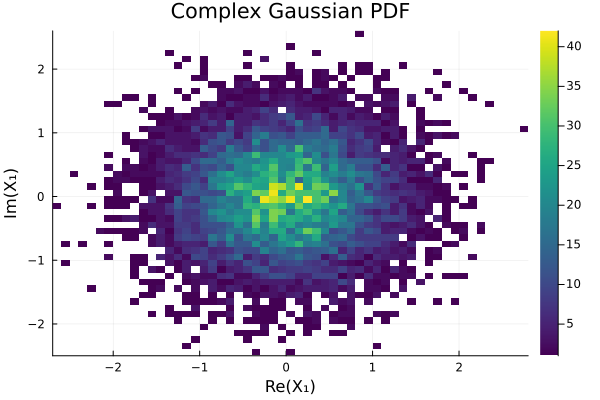

In [4]:
using Random
using LinearAlgebra
using Plots

# Function to generate a complex n-dimensional Gaussian random vector
function generate_complex_gaussian(n::Int, σ::Vector{Float64})
    real_part = randn(n) .* (σ ./ √2)
    imag_part = randn(n) .* (σ ./ √2)
    return real_part + im * imag_part
end

# Function to compute the PDF of a complex Gaussian random vector
function pdf_complex_gaussian(x::Vector{ComplexF64}, Σ::Diagonal{Float64})
    n = length(x)
    det_Σ = prod(Σ.diag)   # Determinant of diagonal covariance matrix
    inv_Σ = inv(Σ)         # Inverse of covariance matrix
    x_conj_transpose = x'  # Hermitian transpose of vector x

    # Calculate the PDF using the formula
    pdf_value = (1 / (π^n * det_Σ)) * exp(-real(x_conj_transpose * inv_Σ * x))
    return pdf_value
end

# Parameters
n = 2                           # Dimension of the vector
σ = [1.0, 0.5]                  # Standard deviations for each dimension
Σ = Diagonal(σ.^2)              # Covariance matrix

# Generate random samples
num_samples = 10_000
samples = [generate_complex_gaussian(n, σ) for _ in 1:num_samples]

# Compute PDF values for each sample
pdf_values = [pdf_complex_gaussian(sample, Σ) for sample in samples]

# Separate real and imaginary parts for plotting
real_parts = [real(x[1]) for x in samples]
imag_parts = [imag(x[1]) for x in samples]

# Plot a 2D histogram of the complex Gaussian samples and PDF density levels
plot(real_parts, imag_parts, seriestype=:scatter, alpha=0.4, title="Complex Gaussian Distribution",
     xlabel="Re(X₁)", ylabel="Im(X₁)", legend=false)

# Overlay density levels using a contour plot
density = histogram2d(real_parts, imag_parts, bins=50, color=:viridis, xlabel="Re(X₁)", ylabel="Im(X₁)", title="Complex Gaussian PDF")
